# Exploratory Data Analysis

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading the Dataset

In [56]:
data = pd.read_csv(r"C:\Users\BVR\Desktop\Exploratory Data Analysis\Dataset\Loan Prediction Dataset.csv")
print(data.columns)
print(data.size)
data.head()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
7982


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Data Analysis

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


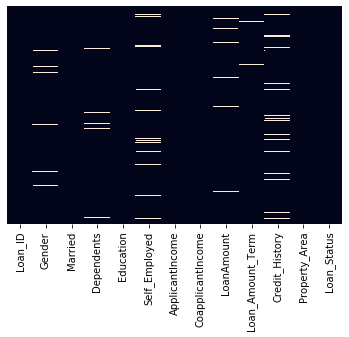

In [58]:
print(data.isnull().sum())  #checking for null values
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)  #best way of checking showing null values
plt.show()

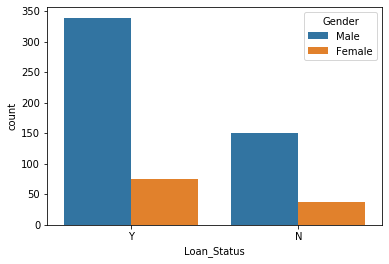

In [59]:
sns.countplot(x='Loan_Status', hue='Gender', data=data) #here we can analyze whether loan is approved on not based on gender 

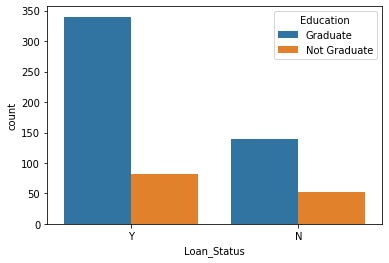

In [60]:
sns.countplot(x='Loan_Status', hue='Education', data=data) #here we can analyze whether loan is approved on not based on education

In [61]:
#seperating categorical and numerical variables
cat_data = []  
num_data = []

for index, type in enumerate(data.dtypes):
    if type == "object":
        cat_data.append(data.iloc[:, index])
    else:
        num_data.append(data.iloc[:,index])

In [62]:
cat_data = pd.DataFrame(cat_data).transpose()
cat_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [63]:
num_data = pd.DataFrame(num_data).transpose()
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0


Data Cleaning

     We can convert categorical variables using different types of encodings. There are different ways for data cleaning. We can drop unwanted data, fill the missing data using mean, median methods known as Data Imputation.

In [64]:
cat_data = cat_data.drop(['Loan_ID','Dependents','Self_Employed'],axis=1) #just for example but they can be important when creating a model for predicting whether the loan to be sanctioned or not

In [65]:
cat_data.head()

,Gender,Married,Education,Property_Area,Loan_Status
0,Male,No,Graduate,Urban,Y
1,Male,Yes,Graduate,Rural,N
2,Male,Yes,Graduate,Urban,Y
3,Male,Yes,Not Graduate,Urban,Y
4,Male,No,Graduate,Urban,Y


In [66]:
cat_data.Property_Area.unique() 

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [67]:
cat_data.Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [68]:
cat_data.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [69]:
#convert categorical variables to numerical variables (encoding)
cat_data = cat_data.replace(to_replace={"Male":'0',"Female":'1',
                                        "Urban":'0',"Rural":'1',"Semiurban":'2',
                                        "Yes":"0","No":"1",
                                        "Y":"0","N":"1"})
cat_data.head()

,Gender,Married,Education,Property_Area,Loan_Status
0,0,1,Graduate,0,0
1,0,0,Graduate,1,1
2,0,0,Graduate,0,0
3,0,0,Not Graduate,0,0
4,0,1,Graduate,0,0


In [70]:
cat_data.Property_Area.unique()

array(['0', '1', '2'], dtype=object)

In [71]:
#one hot encoding
cat_data = pd.get_dummies(cat_data, columns=['Education'])
cat_data.head()

,Gender,Married,Property_Area,Loan_Status,Education_Graduate,Education_Not Graduate
0,0,1,0,0,1,0
1,0,0,1,1,1,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,1,0,0,1,0


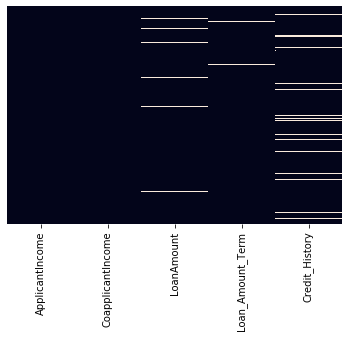

In [72]:
sns.heatmap(num_data.isnull(), yticklabels=False, cbar=False)  #best way of checking showing null values

In [73]:
#fill the missing values in loan_amount_term and credit_history using bfill method and loanamount with median
num_data.Loan_Amount_Term = num_data.Loan_Amount_Term.fillna(method="bfill")
num_data.Credit_History = num_data.Credit_History.fillna(method="bfill")
num_data.LoanAmount = num_data.LoanAmount.fillna(num_data["LoanAmount"].median())
num_data.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [74]:
#lets combine both the numerical and categorical dataframes
data = pd.concat([num_data, cat_data], axis=1)
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Property_Area,Loan_Status,Education_Graduate,Education_Not Graduate
0,5849.0,0.0,128.0,360.0,1.0,0,1,0,0,1,0
1,4583.0,1508.0,128.0,360.0,1.0,0,0,1,1,1,0
2,3000.0,0.0,66.0,360.0,1.0,0,0,0,0,1,0
3,2583.0,2358.0,120.0,360.0,1.0,0,0,0,0,0,1
4,6000.0,0.0,141.0,360.0,1.0,0,1,0,0,1,0


In [75]:
data.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender                    13
Married                    3
Property_Area              0
Loan_Status                0
Education_Graduate         0
Education_Not Graduate     0
dtype: int64

In [76]:
#lets drop these rows
data = data.dropna()
data.isnull().sum()

ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Gender                    0
Married                   0
Property_Area             0
Loan_Status               0
Education_Graduate        0
Education_Not Graduate    0
dtype: int64